# HW1: Setup, Prerequisites, and Image Classification

## Course Policies

Here are some important course policies. These are also located at
http://www.ds100.org/fa17/.

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your solution.

## This assignment

This part goes over prerequisites to taking DS100.

* How to set up Jupyter on your own computer.
* How to check out and submit assignments for this class.
* Python basics, like defining functions.
* How to use the `numpy` library to compute with arrays of numbers.
* Partial derivatives and matrix expressions


## Due Date

This assignment is due at 11:59pm Tuesday, September 5th. Instructions for submission are at the bottom of this assignment.

Note that while this assignment is due on a Tuesday, all other assignments in the course will be due Mondays. Please plan accordingly.


## Part 1: Prerequisites

### Setup

If you haven't already, go through the instructions at
http://www.ds100.org/fa17/setup.

The instructions for submission are at the end of this notebook.

You should now be able to open this notebook in Jupyter and run cells.

### Running a Cell

Try running the following cell.  If you unfamiliar with Jupyter Notebooks consider skimming [this tutorial](http://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb) or selecting **Help -> User Interface Tour** in the menu above. 

In [65]:
print("Hello World!")

Hello World!


Even if you are familiar with Jupyter, we strongly encourage you to become proficient with keyboard shortcuts (this will save you time in the future).  To learn about keyboard shortcuts go to **Help -> Keyboard Shortcuts** in the menu above. 

Here are a few we like:
1. `ctrl`+`return` : *Evaluate the current cell*
1. `shift`+`return`: *Evaluate the current cell and move to the next*
1. `esc` : *command mode* (required before using any of the commands below)
1. `a` : *create a cell above*
1. `b` : *create a cell below*
1. `d` : *delete a cell*
1. `m` : *convert a cell to markdown*
1. `y` : *convert a cell to code*

### Setup Grading Tools 

First, let's make sure you have the latest version of okpy.

In [2]:
!pip install -U okpy

Requirement already up-to-date: okpy in /Users/ShreyMalhotra/anaconda3/lib/python3.6/site-packages
Requirement already up-to-date: requests==2.12.4 in /Users/ShreyMalhotra/anaconda3/lib/python3.6/site-packages (from okpy)


### Testing your Setup

If you've set up your environment properly, this cell should run without problems:

In [1]:
import math
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import skimage
import skimage.io
import skimage.filters

from client.api.notebook import Notebook
ok = Notebook('hw1.ok')
import os
os.remove(os.path.join(os.path.expanduser('~'), '.config', 'ok', 'auth_refresh'))

Assignment: Homework 1
OK, version v1.12.10



Now, run the cell below to log into OkPy.

Sometimes, the cell below won't work if you've logged into OkPy previously (eg. in Data 8). If you get a strange-looking error when you run the cell below, copy and paste this code at the bottom of the previous cell, run it, and try to log in again:

```python
import os
os.remove(os.path.join(os.path.expanduser('~'), '.config', 'ok', 'auth_refresh'))
```

In [35]:
ok.auth()


Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: xua874YzHX2UYdMjOLc3Gw1ItMH7CP
Successfully logged in as shrey@berkeley.edu


### Python

Python is the main programming language we'll use in the course. We expect that you've taken CS61A or an equivalent class, so you should be able to explain the following cells. Run them and make sure you understand what is happening in each.

If this seems difficult, please review one or more of the following materials.

- **[Python Tutorial](https://docs.python.org/3.5/tutorial/)**: Introduction to Python from the creators of Python
- **[Composing Programs Chapter 1](http://composingprograms.com/pages/11-getting-started.html)**: This is more of a introduction to programming with Python.
- **[Advanced Crash Course](http://cs231n.github.io/python-numpy-tutorial/)**: A fast crash course which assumes some programming background.


<img src="launch.png" width="40px" align="left" float="left"/>
#### Mathematical Expressions
Note that the rocket icon indicates that you should just run the following cells.

In [36]:
# This is a comment.
# In Python, the ** operator performs exponentiation.
math.sqrt(math.e ** (-math.pi + 1))

0.3427354792736325

<img src="launch.png" width="40px" align="left" float="left"/>
#### Output and Printing

In [37]:
"Why didn't this line print?"

print("Hello" + ",", "world!")

"Hello, cell" + "output!"

Hello, world!


'Hello, celloutput!'

<img src="launch.png" width="40px" align="left" float="left"/>
#### For Loops

In [13]:
# A for loop repeats a block of code once for each
# element in a given collection.
for i in range(5):
    if i % 2 == 0:
        print(2**i)
    else:
        print("Odd power of 2")

1
Odd power of 2
4
Odd power of 2
16


<img src="launch.png" width="40px" align="left" float="left"/>
#### List Comprehension

In [14]:
[str(i) + " sheep." for i in range(1,5)] 

['1 sheep.', '2 sheep.', '3 sheep.', '4 sheep.']

In [15]:
[i for i in range(10) if i % 2 == 0]

[0, 2, 4, 6, 8]

<img src="launch.png" width="40px" align="left" float="left"/>
#### Defining Functions

In [18]:
def add2(x):
    """This docstring explains what this function does: it adds 2 to a number."""
    return x + 2

<img src="launch.png" width="40px" align="left" float="left"/>
#### Getting Help

In [19]:
help(add2)

Help on function add2 in module __main__:

add2(x)
    This docstring explains what this function does: it adds 2 to a number.



In [22]:
add2?

You can close the window at the bottom by pressing `esc` several times. 

<img src="launch.png" width="40px" align="left" float="left"/>
#### Passing Functions as Values

In [23]:
def makeAdder(amount):
    """Make a function that adds the given amount to a number."""
    def addAmount(x):
        return x + amount
    return addAmount

add3 = makeAdder(3)
add3(4)

7

In [24]:
makeAdder(3)(4)

7

<img src="launch.png" width="40px" align="left" float="left"/>
#### Anonymous Functions and Lambdas

In [25]:
# add4 is very similar to add2, but it's been created using a lambda expression.
add4 = lambda x: x + 4
add4(5)

9

<img src="launch.png" width="40px" align="left" float="left"/>
#### Recursion

In [26]:
def fib(n):
    if n <= 1:
        return 1
    else:
        # Functions can call themselves recursively.
        return fib(n-1) + fib(n-2)

fib(6)

13

### Question 1

#### Question 1a
Write a function nums_reversed that takes in an integer `n` and returns a string
containing the numbers 1 through `n` including `n` in reverse order, separated
by spaces. For example:

    >>> nums_reversed(5)
    '5 4 3 2 1'

***Note:*** The ellipsis (`...`) indicates something you should fill in.  It *doesn't* necessarily imply you should replace it with only one line of code.


<img src="code.png" width="75px" align="left"/> 
<br/>
The code icon indicates that you should complete the following block of code.

In [4]:
def nums_reversed(n):
    list1 = []
    for i in range (1,n+1):
        list1.append(i)
    list_reversed = list1[::-1]
    string_of_list = ' '.join(str(i) for i in list_reversed)
    
    return string_of_list

In [5]:
_ = ok.grade('q01a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw1.ipynb'.
Performing authentication
Please enter your bCourses email.
bCourses email: shrey@berkeley.edu
Successfully logged in as shrey@berkeley.edu
Backup... 100% complete
Backup successful for user: shrey@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw1/backups/pYPRG2
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 1b

Write a function `string_splosion` that takes in a non-empty string like
`"Code"` and returns a long string containing every prefix of the input.
For example:

    >>> string_splosion('Code')
    'CCoCodCode'
    >>> string_splosion('data!')
    'ddadatdatadata!'
    >>> string_splosion('hi')
    'hhi'

**Hint:** Try to use recursion. Think about how you might answering the following two questions:
1. **[Base Case]** What is the `string_splosion` of the empty string?
1. **[Inductive Step]** If you had a `string_splosion` function for the first $n-1$ characters of your string how could you extend it to the $n^{th}$ character? For example, `string_splosion("Cod") = "CCoCod"` becomes `string_splosion("Code") = "CCoCodCode"`.

<img src="code.png" width="75px" align="left"/> 

In [70]:
def string_splosion(string):
    s = ""
    for i in range (1, len(string) + 1):
        s += string[:i]
    return s

In [71]:
_ = ok.grade('q01b')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw1.ipynb'.
Backup... 100% complete
Backup successful for user: shrey@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw1/backups/qx9QEk
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 1c

Write a function `double100` that takes in a list of integers
and returns `True` only if the list has two `100`s next to each other.

    >>> double100([100, 2, 3, 100])
    False
    >>> double100([2, 3, 100, 100, 5])
    True

<img src="code.png" width="75px" align="left"/> 

In [72]:
def double100(nums):
    for i in nums:
        if i == 100:
            for j in nums[1:]:
                if i == 100:
                    return True
    return False
    

In [73]:
_ = ok.grade('q01c')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw1.ipynb'.
Backup... 100% complete
Backup successful for user: shrey@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw1/backups/rk62GW
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



### NumPy and Tables

The `NumPy` library lets us do fast, simple computing with numbers in Python. 

You should be able to understand the code in the following cells. If not, review the following:

* [DS100 Numpy Review](http://ds100.org/fa17/assets/notebooks/numpy/Numpy_Review.html)
* [Condensed Numpy Review](http://cs231n.github.io/python-numpy-tutorial/#numpy)
* [The Official Numpy Tutorial](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)



**Jupyter pro-tip**: Pull up the docs for any function in Jupyter by running a cell with
the function name and a `?` at the end:

<img src="launch.png" width="40px" align="left" float="left"/>

In [74]:
np.arange?

**Another Jupyter pro-tip**: Pull up the docs for any function in Jupyter by typing the function
name, then `<Shift>-<Tab>` on your keyboard. Super convenient when you forget the order
of the arguments to a function. You can press `<Tab>` multiple tabs to expand the docs.

Try it on the function below:

In [75]:
np.linspace?

You can use the tips above to help you deciper the following code.

<img src="launch.png" width="40px" align="left" float="left"/>

In [76]:
# Let's take a 20-sided die...
NUM_FACES = 20

# ...and roll it 4 times
rolls = 4

# What's the probability that all 4 rolls are different? It's:
# 20/20 * 19/20 * 18/20 * 17/20
prob_diff = np.prod((NUM_FACES - np.arange(rolls))
                    / NUM_FACES)
prob_diff

0.72675000000000001

In [77]:
# Let's compute that probability for 1 roll, 2 rolls, ..., 20 rolls.
# The array ys will contain:
# 
# 20/20
# 20/20 * 19/20
# 20/20 * 18/20
# ...
# 20/20 * 19/20 * ... * 1/20

xs = np.arange(20)
ys = np.cumprod((NUM_FACES - xs) / NUM_FACES)

# Python slicing works on arrays too
ys[:5]

array([ 1.     ,  0.95   ,  0.855  ,  0.72675,  0.5814 ])

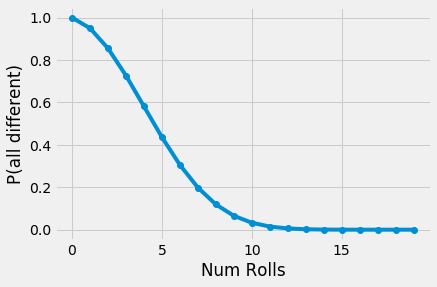

In [78]:
plt.plot(xs, ys, 'o-')
plt.xlabel("Num Rolls")
plt.ylabel('P(all different)')

In [79]:
# Mysterious...
mystery = np.exp(-xs ** 2 / (2 * NUM_FACES))
mystery

array([  1.00000000e+00,   9.75309912e-01,   9.04837418e-01,
         7.98516219e-01,   6.70320046e-01,   5.35261429e-01,
         4.06569660e-01,   2.93757700e-01,   2.01896518e-01,
         1.31993843e-01,   8.20849986e-02,   4.85578213e-02,
         2.73237224e-02,   1.46253347e-02,   7.44658307e-03,
         3.60656314e-03,   1.66155727e-03,   7.28152539e-04,
         3.03539138e-04,   1.20362805e-04])

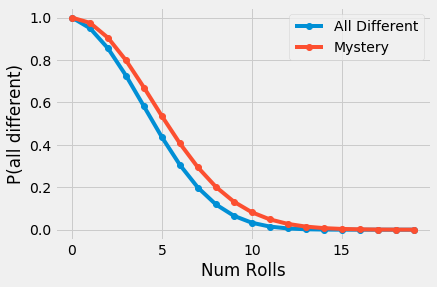

In [80]:
# If you're curious, this is the exponential approximation for our probability:
# https://textbook.prob140.org/ch1/Exponential_Approximation.html
plt.plot(xs, ys, 'o-', label="All Different")
plt.plot(xs, mystery, 'o-', label="Mystery")
plt.xlabel("Num Rolls")
plt.ylabel('P(all different)')
plt.legend()

### Question 2

To test your understanding of Numpy we will work through some basic image exercises.  In the process we will explore  visual perception and color.

Images are 2-dimensional grids of pixels. Each pixel contains 3 values between 0 and 1 that specify how much red, green, and blue go into each pixel.

We can create images in NumPy:

<img src="launch.png" width="40px" align="left" float="left"/>

In [81]:
simple_image = np.array([
    [[  0,   0, 0], [0.5, 0.5, 0.5], [1.0, 1.0, 1.0]], # Grayscale pixels
    [[1.0,   0, 0], [  0, 1.0,   0], [  0,   0, 1.0]], # Pure RGB pixels
    [[0.5, 0.5, 0], [0.5,   0, 0.5], [  0, 0.5, 0.5]], # Blend of 2 colors
])
simple_image

array([[[ 0. ,  0. ,  0. ],
        [ 0.5,  0.5,  0.5],
        [ 1. ,  1. ,  1. ]],

       [[ 1. ,  0. ,  0. ],
        [ 0. ,  1. ,  0. ],
        [ 0. ,  0. ,  1. ]],

       [[ 0.5,  0.5,  0. ],
        [ 0.5,  0. ,  0.5],
        [ 0. ,  0.5,  0.5]]])

We can then use the [`scikit-image`](http://scikit-image.org/) library to display an image:

<img src="launch.png" width="40px" align="left" float="left"/>

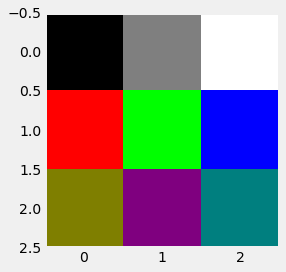

In [82]:
# Curious how this method works? Try using skimage.io.imshow? to find out.
# Or, you can always look at the docs for the method.
skimage.io.imshow(simple_image)
plt.grid(False) # Disable matplotlib's grid lines

We can read in image files using the `skimage.io.imread` method.  

*Note that in many image formats (e.g., JPEG) image values are numbers between 0 and 255 corresponding to a byte.  Therefore we divide each pixel value by 255 to obtain numbers between 0 and 1.*  

<img src="launch.png" width="40px" align="left" float="left"/>

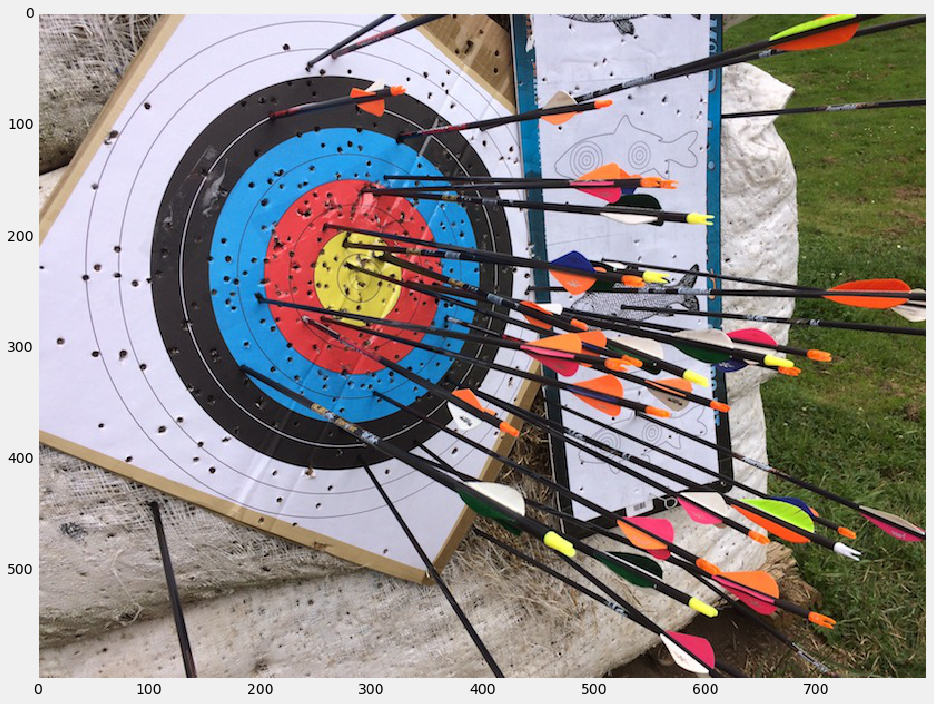

In [83]:
plt.figure(figsize=(20,10))

# Some image files (including .jpg files) have pixel values in between
# 0 and 255 when read. We divide by 255 to scale the values between 0 and 1:
pic = skimage.io.imread('target.jpg')/255


skimage.io.imshow(pic)
plt.grid(False) # Disable matplotlib's grid lines

*Professor Gonzalez is a **very amateur** archer*.

#### Question 2a

Complete the following block of code to plot the Red, Green, and Blue color channels separately.  The resulting images should appear in black and white.

* **Hint:** `pic[:, :, 0]` will slice the image to extract the red color channel.  Plotting the resulting matrix will generate a black and white picture.*

<img src="code.png" width="75px" align="left"/> 


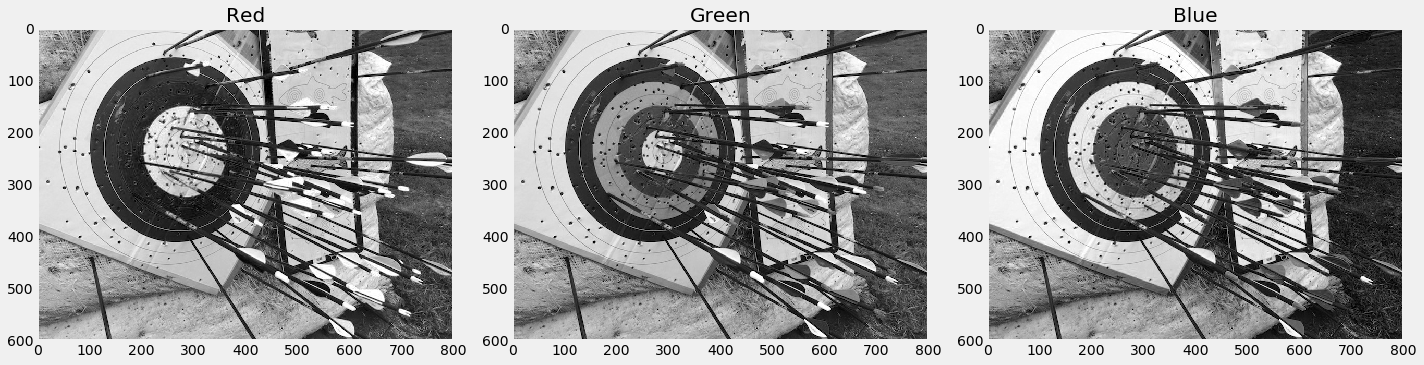

In [84]:
plt.figure(figsize=(20,10)) 
channel_names = ["Red", "Green", "Blue"]
pic = skimage.io.imread('target.jpg')/255

# Loop through index of each channel
for channel in range(3):
    # Make a subplot
    plt.subplot(1,3,channel+1)
    # FINISH THE CODE
    # Hint: you should write one line of code that calls
    # `skimage.io.imshow`
    skimage.io.imshow(pic[:, :, channel])
    plt.grid(False)
    plt.title(channel_names[channel])



#### Question 2b

Surprisingly the human eye doesn't see all colors equally.  To demonstrate this we will study how blurring color channels affects image appearance.  First, we will try to blur each color channel individually.  Complete the following block of code using the `skimage.filters.gaussian` blurring function (read the docs) to render a blurry black and white image for each of the color channels.  You should set the standard deviation of the Gaussian blurring kernel `sigma` to 10.

<img src="code.png" width="75px" align="left"/> 

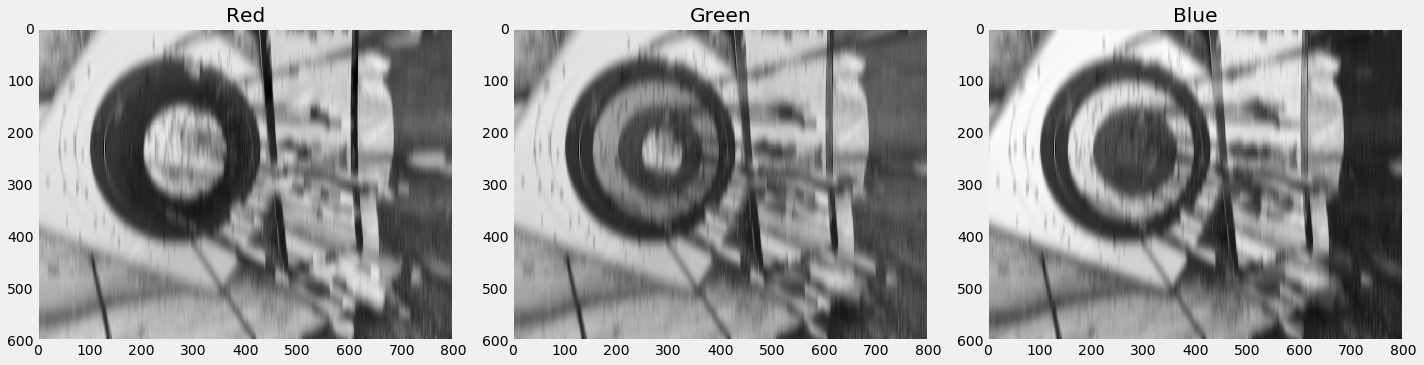

In [85]:
plt.figure(figsize=(20,10))
pic = skimage.io.imread('target.jpg')/255

sigma = 10

# Loop through index of each channel
for channel in range(3):
    # Make a subplot
    plt.subplot(1,3,channel+1)
    # FINISH THE CODE
    response = skimage.filters.gaussian(pic[:, :, channel], sigma, multichannel=True)
    skimage.io.imshow(response)
    plt.grid(False)
    plt.title(channel_names[channel])


#### Question 2c

Using the following block of code:

```python
pic_copy = pic.copy()
pic_copy[:, :, channel] = ...
skimage.io.imshow(pic_copy)
```

we can replace a color channel with a different black and white image.  Complete the following block of code to render three different versions of the full color image with just one of the channels blurred.

<img src="code.png" width="75px" align="left"/> 

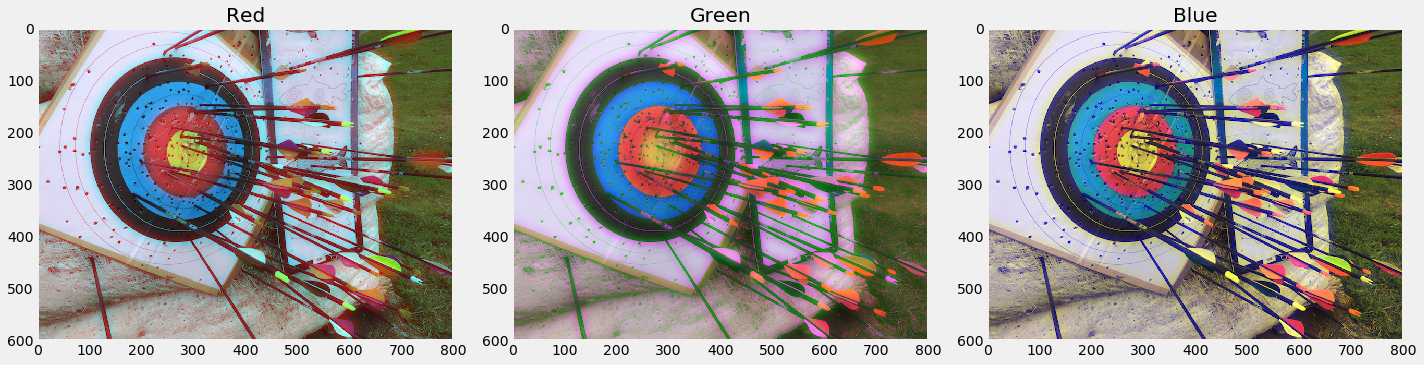

In [86]:
plt.figure(figsize=(20,10))
pic = skimage.io.imread('target.jpg')/255

sigma = 10

# Loop through index of each channel
for channel in range(3):
    # Make a subplot
    plt.subplot(1,3,channel+1)
    # FINISH THE CODE 
    pic_copy = pic.copy()
    pic_copy[:, :, channel] = skimage.filters.gaussian(pic[:, :, channel], sigma, multichannel=None)
    skimage.io.imshow(pic_copy)
    plt.grid(False)
    plt.title(channel_names[channel])

#### Question 2d

Each image should appear slightly different.  Which one is the blurriest and which is the sharpest?  Write a short description of what you see in the cell below.


<img src="write.png" width="120px" align="left" float="left"/> *This icon means you will need to write in text response in the cell below using English.


I observe ...

Blurriest Image - Second Image (Green Channel),
Sharpest Image - Third Image (Blue Channel). 

Additionally, I see that in all cases the green channel shows the most blur even when changing the chanels in the Gaussian filter.


## Multivariable Calculus and Linear Algebra

The following questions ask you to recall your knowledge of multivariable calculus and linear algebra. We will use some of the most fundamental concepts from each discipline in this class, so the following problems should at least seem familiar to you.

For the following problems, you should use LaTeX to format your answer. If you aren't familiar with LaTeX, not to worry. It's not hard to use in a Jupyter notebook. Just place your math in between dollar signs:

\$ f(x) = 2x \$ becomes $ f(x) = 2x $.

If you have a longer equation, use double dollar signs:

\$\$ \sum_{i=0}^n i^2 \$\$ becomes:

$$ \sum_{i=0}^n i^2 $$.

Here are some handy notation:

| Output | Latex   |
|:--|:--|
| $$x^{a + b}$$  | `x^{a + b}` |
| $$x_{a + b}$$ | `x_{a + b}` |
| $$\frac{a}{b}$$ | `\frac{a}{b}` |
| $$\sqrt{a + b}$$ | `\sqrt{a + b}` |
| $$\{ \alpha, \beta, \gamma, \pi, \mu, \sigma^2  \}$$ | `\{ \alpha, \beta, \gamma, \pi, \mu, \sigma^2  \}` |
| $$\sum_{x=1}^{100}$$ | `\sum_{x=1}^{100}` |
| $$\frac{\partial}{\partial x} $$ | `\frac{\partial}{\partial x} ` |
| $$\begin{bmatrix} 2x + 4y \\ 4x + 6y^2 \\ \end{bmatrix}$$ | `\begin{bmatrix} 2x + 4y \\ 4x + 6y^2 \\ \end{bmatrix}`|



[For more about basic LaTeX formatting, you can read this article.](https://www.sharelatex.com/learn/Mathematical_expressions)

If you have trouble with these topics, we suggest reviewing:

- [Khan Academy's Multivariable Calculus](https://www.khanacademy.org/math/multivariable-calculus)
- [Khan Academy's Linear Algebra](https://www.khanacademy.org/math/linear-algebra)

### Question 3

#### Question 3a

Simplify the following expression:

$$
\large \ln \left( 3 e^{2  x} e^{\frac{1}{x^2}} \right)
$$

<img src="write.png" width="120px" align="left" float="left"/> *This icon means you will need to write in text response in the cell below using English + $\LaTeX$.

$$
\ln \left( 3 e^{2  x} e^{\frac{1}{x^2}} \right) = \log(3) + \log(\frac {e^{{2 x} + 1}}{x^2})
$$

#### Question 3b


Suppose we have the following scalar-valued function on $x$ and $y$:

$$ \Large f(x, y) = x^2 + 4xy + 2y^3 + e^{-3y} + \ln(2y) $$

Compute the partial derivative with respect to $x$.

<img src="write.png" width="75px" align="left" float="left"/>

$$ \frac{\partial}{\partial x} f(x,y) = 2x +4y $$

#### Question 3c


Now compute the partial derivative of $f(x,y)$ with respect to $y$:

<img src="write.png" width="75px" align="left" float="left"/>

$$ \frac{\partial}{\partial y} f(x,y) = 4x + 6y^2 + -3e^{-3y} + \frac{1}{y} $$

### Question 4

In this question, we'll ask you to use your linear algebra knowledge to fill in NumPy matrices. To conduct matrix multiplication in NumPy, you should write code like the following:

<img src="launch.png" width="40px" align="left" float="left"/>

In [87]:
# A matrix in NumPy is simply a 2-dimensional NumPy array
matA = np.array([
    [1, 2, 3],
    [4, 5, 6],
])

matB = np.array([
    [10, 11],
    [12, 13],
    [14, 15],
])

# The notation B @ v means: compute the matrix multiplication Bv
matA @ matB

array([[ 76,  82],
       [184, 199]])

You can also use the same syntax to do matrix-vector multiplication or vector dot products. Handy!

<img src="launch.png" width="40px" align="left" float="left"/>

In [88]:
matA = np.array([
    [1, 2, 3],
    [4, 5, 6],
])

# A vector in NumPy is simply a 1-dimensional NumPy array
some_vec = np.array([ 10, 12, 14, ])

another_vec = np.array([ 10, 20, 30 ])

print(matA @ some_vec)
print(some_vec @ another_vec)

[ 76 184]
760


#### Question 4a

Joey, Deb, and Sam are shopping for fruit at Berkeley Bowl. Berkeley Bowl, true to its name, only sells fruit bowls. A fruit bowl contains some fruit and the price of a fruit bowl is the total price of all of its individual fruit.

Berkeley Bowl has apples for \$2.00, bananas \$1.00, and cantaloupes \$4.00 (expensive!). The price of each of these can be written in a vector:

$$
\vec{v} = \begin{bmatrix}
     2 \\
     1 \\
     4 \\
\end{bmatrix}
$$

Berkeley Bowl sells the following fruit bowls:

1. 2 of each fruit
2. 5 apples and 8 bananas
3. 2 bananas and 3 cantaloupes
4. 10 cantaloupes

Create a 2-dimensional numpy array encoding the matrix $B$ such that the matrix-vector multiplication

$$
B\vec{v}
$$

evaluates to a length 4 column vector containing the price of each fruit bowl. The first entry of the result should be the cost of fruit bowl #1, the second entry the cost of fruit bowl #2, etc.

<img src="code.png" width="75px" align="left" float="left"/>

In [89]:
v = np.array([2,1,4])

B = np.array([
     [2, 2, 2],
     [5, 8, 0],
     [0, 2, 3],
     [0, 0, 10],
])

# The notation B @ v means: compute the matrix multiplication Bv
B @ v 

array([14, 18, 14, 40])

In [90]:
_ = ok.grade('q04a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw1.ipynb'.
Backup... 100% complete
Backup successful for user: shrey@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw1/backups/NkROrN
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 4b

Joey, Deb, and Sam make the following purchases:

- Joey buys 2 fruit bowl #1's and 1 fruit bowl #2.
- Deb buys 1 of each fruit bowl.
- Sam buys 10 fruit bowl #4s (he really like cantaloupes).

Create a matrix $A$ such that the matrix expression

$$
AB\vec{v}
$$

evaluates to a length 3 column vector containing how much each of them spent. The first entry of the result should be the total amount spent by Joey, the second entry the amount sent by Deb, etc.

<img src="code.png" width="75px" align="left" float="left"/>

In [93]:
A = np.array([
    [2, 1, 0, 0],
    [1, 1, 1, 1],
    [0, 0, 0, 10],
]) # Finish this!

v = np.array([2,1,4])

B = np.array([
     [2, 2, 2],
     [5, 8, 0],
     [0, 2, 3],
     [0, 0, 10],
    ])
A @ B @ v

array([ 46,  86, 400])

In [94]:
_ = ok.grade('q04b')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw1.ipynb'.
Backup... 100% complete
Backup successful for user: shrey@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw1/backups/XDRQvo
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 4c

Who spent the most money?

<img src="write.png" width="120px" align="left" float="left"/> 

Sam spent the most amount of money.

#### Question 4d

Let's suppose Berkeley Bowl changes their fruit prices, but you don't know what they changed their prices to. Joey, Deb, and Sam buy the same quantity of fruit baskets and the number of fruit in each basket is the same, but now they each spent these amounts:

$$
\vec{x} = \begin{bmatrix}
    80 \\
    80 \\
    100 \\
\end{bmatrix}
$$

Use `np.linalg.inv` and the above final costs to compute the new prices for the individual fruits:

<img src="code.png" width="75px" align="left" float="left"/> 

In [5]:
A = np.array([
    [2, 1, 0, 0],
    [1, 1, 1, 1],
    [0, 0, 0, 10],
])

B = np.array([
     [2, 2, 2],
     [5, 8, 0],
     [0, 2, 3],
     [0, 0, 10],
    ])

price = np.array([80,80,100])

AB = A @ B

AB_inverse = np.linalg.inv(AB)

new_v = AB_inverse @ price
new_v

array([ 5.5       ,  2.20833333,  1.        ])

In [6]:
_ = ok.grade('q04d')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw1.ipynb'.
Backup... 100% complete
Backup successful for user: shrey@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw1/backups/v2kmlL
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



# Submission

You're done! Run the following cell to make a submission on OkPy.

You can then go to www.okpy.org and verify that the submission there is what you want it to be.

If you forget to run this cell in the future, we'll automatically take your latest backup as your submission.

You should shortly receive an email containing the autograder score for your assignment. If you don't receive an email within 30 minutes of submitting, try again. If it still doesn't work, email your TA. **Note that the autograder will only email you once every 30 minutes.**

In [7]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw1.ipynb'.
Submit... 100% complete
Submission successful for user: shrey@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw1/submissions/zpoqv5
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit

